In [1]:
#Exercise 1
using Distributions
using Plots

type AR1
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end 
        

In [2]:
function simulate(m:: AR1, n:: Integer, x0:: Real)
    X = Array(Float64,n)
    i = 1
    X[1] = x0
    while i < n
        X[i+1] = m.a * X[i] + m.b + rand(m.phi)
        i += 1
    end
    return X
end

simulate (generic function with 1 method)

In [3]:
m = AR1(0.9, 1, 1, Beta(4,4))

AR1(0.9,1,1,Distributions.Beta{Float64}(α=4.0, β=4.0))


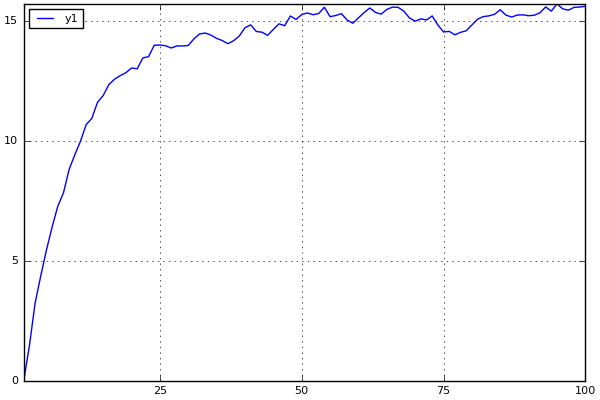

In [5]:
X = simulate(m, 100, 0.0)

plot(X, color ="blue")

In [6]:
#exercise 2


# for the integer case
function f(k::Integer)
    @assert k > 0 "must be pos and integer"
    z_score = randn(k)
    return sum(z_score.^2)
end

f (generic function with 1 method)

In [7]:
#test case 1, does it work?
f(4)

3.7005336560294286

In [8]:
#test case 2, for neg numbers should crash and give errors
f(-4)

LoadError: AssertionError: must be pos and integer

In [9]:
#test case 3, for non integer numbers should crash
f(3.1415)

LoadError: MethodError: no method matching f(::Float64)[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[6]:6[0m

In [10]:
#test case 4,complex numbers should crash
f(2+im)

LoadError: MethodError: no method matching f(::Complex{Int64})[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[6]:6[0m

In [11]:
#vectorized version

function f{T<:Integer}(k_vec::Array{T,1})
    for k in k_vec
        @assert k > 0 "still looking for natural numbers..."
    end
    
    N = length(k_vec)
    sample = Array(Float64, N)
    for i in 1:N
        z_score = randn(k_vec[i])
        sample[i] = sum(z_score.^2)
    end
    return sample
end

f (generic function with 2 methods)

In [12]:
#test cases....
f([1,2,3,4])

4-element Array{Float64,1}:
 0.0265629
 0.188963 
 2.71618  
 2.95777  

In [13]:
f(2)

1.1798210071120914

In [14]:
f(2.2)

LoadError: MethodError: no method matching f(::Float64)[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[6]:6
  f{T<:Integer}([1m[31m::Array{T<:Integer,1}[0m) at In[11]:4[0m

In [15]:
f([2.2,2])

LoadError: MethodError: no method matching f(::Array{Float64,1})[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[6]:6
  f{T<:Integer}([1m[31m::Array{T<:Integer,1}[0m) at In[11]:4[0m

In [16]:
f([1;2;3])

3-element Array{Float64,1}:
 0.521195
 0.388711
 2.3045  

In [17]:
f([1+im;2+im;3])

LoadError: MethodError: no method matching f(::Array{Complex{Int64},1})[0m
Closest candidates are:
  f([1m[31m::Integer[0m) at In[6]:6
  f{T<:Integer}([1m[31m::Array{T<:Integer,1}[0m) at In[11]:4[0m